<a href="https://colab.research.google.com/github/comap2mask2guty-stack/LABORATORIO-4/blob/main/LABORATORIO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

presentado por
Francisco gutierrez
grupo IA


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando el modelo...
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.5730 - loss: 0.6757 - val_accuracy: 0.6655 - val_loss: 0.6092
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6803 - loss: 0.5918 - val_accuracy: 0.6650 - val_loss: 0.6008
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7173 - loss: 0.5492 - val_accuracy: 0.7165 - val_loss: 0.5490
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7394 - loss: 0.5230 - val_accuracy: 0.7235 - val_loss: 0.5417
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7561 - loss: 0.4935 - val_accuracy: 0.7520 - val_loss: 0.5084
63/63 - 0s - 7ms/step - accuracy: 0.7520 - loss: 0.5084

Precisión del modelo: 75.20%
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


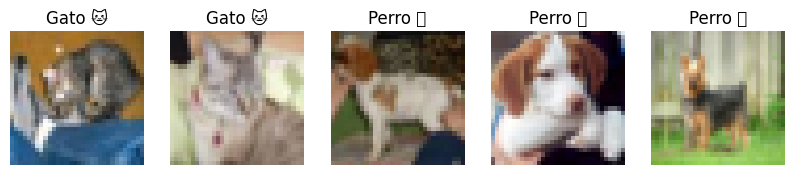

In [8]:
# -------------------------------------------------------------
# CLASIFICADOR SIMPLE DE IMÁGENES (GATOS VS PERROS)
# Aprendizaje supervisado con TensorFlow y Keras
# -------------------------------------------------------------

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1. Cargamos un conjunto de datos de ejemplo
# -------------------------------------------------------------
# Keras incluye un dataset de gatos y perros ya etiquetado
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Filtramos solo gatos (label 3) y perros (label 5)
train_filter = np.where((train_labels == 3) | (train_labels == 5))[0]
test_filter = np.where((test_labels == 3) | (test_labels == 5))[0]

train_images, train_labels = train_images[train_filter], train_labels[train_filter]
test_images, test_labels = test_images[test_filter], test_labels[test_filter]

# Convertimos etiquetas: gato=0, perro=1
train_labels = (train_labels == 5).astype(int)
test_labels = (test_labels == 5).astype(int)

# -------------------------------------------------------------
# 2. Normalizamos las imágenes (0-255 → 0-1)
# -------------------------------------------------------------
train_images = train_images / 255.0
test_images = test_images / 255.0

# -------------------------------------------------------------
# 3. Creamos el modelo (Red Neuronal Convolucional simple)
# -------------------------------------------------------------
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # salida binaria (0 o 1)
])

# -------------------------------------------------------------
# 4. Compilamos el modelo
# -------------------------------------------------------------
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# -------------------------------------------------------------
# 5. Entrenamos el modelo
# -------------------------------------------------------------
print("Entrenando el modelo...")
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# -------------------------------------------------------------
# 6. Evaluamos el modelo
# -------------------------------------------------------------
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nPrecisión del modelo: {test_acc*100:.2f}%')

# -------------------------------------------------------------
# 7. Visualizamos algunas predicciones
# -------------------------------------------------------------
predictions = (model.predict(test_images) > 0.5).astype("int32")

plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(test_images[i])
    label = "Perro 🐶" if predictions[i] == 1 else "Gato 🐱"
    plt.title(label)
    plt.axis('off')
plt.show()


In [9]:
# -------------------------------------------------------------
# APRENDIZAJE NO SUPERVISADO CON IMÁGENES DE NÚMEROS
# Agrupamiento con K-Means (sin etiquetas)
# -------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import mnist

# -------------------------------------------------------------
# 1. Cargar el conjunto de datos (MNIST)
# -------------------------------------------------------------
# Contiene imágenes de números del 0 al 9 (28x28 píxeles)
(train_images, _), (test_images, _) = mnist.load_data()

# Usamos solo 10,000 imágenes para hacerlo


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
